In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2")

In [3]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["VGT", "SPY"]
# Set timefram to '1D" for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG from Alpacas get_barset function end today variable to get current close prices
# (use a limit=1000 parameter to call the most recent 1000 days of data)
portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df
# Drop the time component of the date
portfolio.index=portfolio.index.date
# Preview data
portfolio.head()

SPY                                          VGT          \
              open      high     low   close     volume    open    high   
2021-10-01  430.98  436.0329  427.24  434.19  110774792  403.14  408.03   

                                    
               low   close  volume  
2021-10-01  398.68  407.05  559079

In [4]:
# Set start and end dates of three years back from today.
start_date = pd.Timestamp('2018-10-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-11', tz='America/New_York').isoformat()

In [5]:
# Get 3 years' worth of historical data for SPY and VGT
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["VGT", "SPY"]
stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Set timefram to '1D" for Alpaca API
timeframe = "1D"
stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000).df
# Drop the time component of the date
stock_data.index=stock_data.index.date
# Display sample data
stock_data.tail()

SPY                                         VGT          \
              open      high     low   close    volume    open    high   
2021-10-05  430.24  435.4900  429.39  433.05  82381830  398.28  405.00   
2021-10-06  429.27  435.1199  427.54  434.92  99477866  398.57  405.87   
2021-10-07  438.39  441.6800  438.20  438.64  64139858  409.42  413.10   
2021-10-08  439.48  439.8900  437.19  437.82  57510090  411.62  411.62   
2021-10-11  437.16  440.2600  434.62  434.67  54993389  406.01  411.12   

                                         
                 low   close     volume  
2021-10-05  397.9400  402.64   451395.0  
2021-10-06  397.2200  405.50  1006732.0  
2021-10-07  408.9400  409.98   521141.0  
2021-10-08  407.4757  407.94   230775.0  
2021-10-11  405.5000  405.63   239761.0

In [6]:
# Configuring a Monte Carlo simulation to forecast 20 years cumulative returns
MC_20_years = MCSimulation(
    portfolio_data = stock_data, weights = [.50,.50],
    num_simulation = 500, 
    num_trading_days = 252*20
)

In [7]:
MC_20_years.portfolio_data.tail()


SPY                                                      VGT  \
              open      high     low   close    volume daily_return    open   
2021-10-05  430.24  435.4900  429.39  433.05  82381830     0.010171  398.28   
2021-10-06  429.27  435.1199  427.54  434.92  99477866     0.004318  398.57   
2021-10-07  438.39  441.6800  438.20  438.64  64139858     0.008553  409.42   
2021-10-08  439.48  439.8900  437.19  437.82  57510090    -0.001869  411.62   
2021-10-11  437.16  440.2600  434.62  434.67  54993389    -0.007195  406.01   

                                                              
              high       low   close     volume daily_return  
2021-10-05  405.00  397.9400  402.64   451395.0     0.014104  
2021-10-06  405.87  397.2200  405.50  1006732.0     0.007103  
2021-10-07  413.10  408.9400  409.98   521141.0     0.011048  
2021-10-08  411.62  407.4757  407.94   230775.0    -0.004976  
2021-10-11  411.12  405.5000  405.63   239761.0    -0.005663

In [8]:
# Running a Monte Carlo simulation to forecast 20 years cumulative returns
MC_20_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994656,1.007877,0.990028,0.993797,0.997342,0.983308,0.986258,1.010866,0.992776,0.978862,...,1.001450,1.000372,1.008958,0.998932,0.994952,0.996377,0.968749,1.018845,0.991767,0.992003
2,0.997048,1.023565,0.973328,0.976737,0.991675,0.988611,0.997095,1.003994,1.002527,0.986536,...,1.001008,1.011200,1.008295,1.010069,0.992863,0.998143,1.001248,1.017636,0.998755,0.972207
3,1.009723,1.017253,0.965857,0.977693,1.012346,0.981008,0.998118,0.996381,1.017140,1.005822,...,0.980066,1.027984,1.013701,0.998883,0.995910,1.005198,1.017142,1.016884,0.994911,0.969802
4,1.003713,1.011338,0.956765,0.978235,1.016613,0.979758,0.997347,0.987622,1.012506,1.008316,...,0.980679,1.045904,1.014258,0.992328,0.999898,1.008809,1.034200,1.010532,1.001080,0.954871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,180.500120,227.860150,154.905135,190.600076,49.715015,115.206252,72.243123,27.977737,83.995684,164.549496,...,335.567392,139.474966,37.118761,70.889183,154.714878,144.050236,181.453328,145.035861,143.423416,95.064013
5037,182.333056,228.923016,153.653122,191.174708,49.310925,116.541561,72.857023,28.532320,84.265604,162.749618,...,331.854696,139.079066,37.231863,70.730163,155.718634,143.971577,180.838368,143.357627,144.166575,95.925456
5038,182.008968,229.394959,152.571759,192.517063,48.887174,114.034844,73.532559,28.251581,84.812570,166.029853,...,328.734539,137.424709,37.254731,71.753406,153.332578,145.495041,179.305760,145.477943,146.463886,96.714689
5039,181.698621,229.366312,154.756140,192.621259,49.005428,112.910162,73.772370,28.474209,83.055172,166.111918,...,333.836628,137.359470,36.937360,71.532357,153.785883,143.576202,176.890487,145.746581,143.460716,95.355553


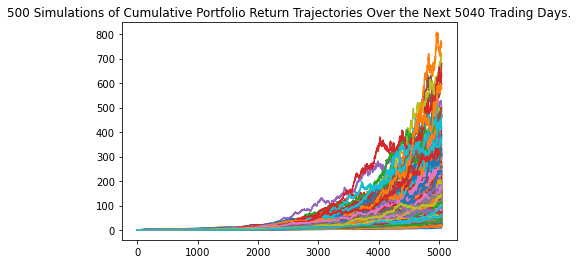

In [9]:
# Plot simulation outcomes
line_plot = MC_20_years.plot_simulation()

In [10]:
# Configuring a Monte Carlo simulation to forecast 20 years cumulative returns
MC_30_years = MCSimulation(
    portfolio_data = stock_data, weights = [.50,.50],
    num_simulation = 500, 
    num_trading_days = 252*30)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

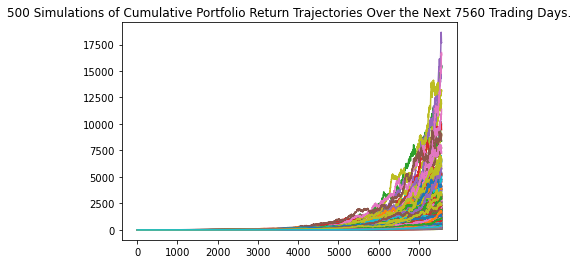

In [11]:
# Plot simulation outcomes
line_plot = MC_30_years.plot_simulation()

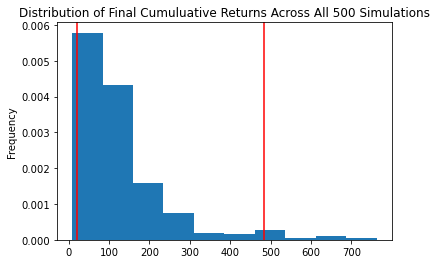

In [12]:
# Plot probability distribution and confidence intervals
dist_plot = MC_20_years.plot_distribution()

In [13]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_20_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean            129.515373
std             115.149241
min               8.691329
25%              58.273805
50%              96.678508
75%             155.763138
max             762.181728
95% CI Lower     21.374403
95% CI Upper    484.632263
Name: 5040, dtype: float64


In [14]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 20 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 20 years will end within in the range of $427488.07 and $9692645.27


In [15]:
# Set initial investment
initial_investment = 1000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*1000,2)
ci_upper = round(tbl[9]*1000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 20 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $1000 in the portfolio over the next 20 years will end within in the range of $21374.4 and $484632.26
